In [1]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [2]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

# Paths for your dataset (change according to your setup)
image_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/train/images/'
label_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/train/labels/'

# Preprocessing Parameters
img_size = (416, 416)  # Standard YOLOv8 size

# Function to preprocess images
def preprocess_image(image):
    # Resize the image
    image_resized = cv2.resize(image, img_size)
    # Normalize pixel values to [0, 1]
    image_normalized = image_resized / 255.0
    return image_normalized

# Display few samples after preprocessing
def visualize_preprocessed_images(image_paths, n=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:n]):
        img = cv2.imread(img_path)
        img = preprocess_image(img)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Get all image paths
image_paths = glob(os.path.join(image_path, '*.jpg'))  # Modify if images are in other formats

# Apply preprocessing and visualize
visualize_preprocessed_images(image_paths)


<Figure size 1500x500 with 0 Axes>

In [4]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 101MB/s]


In [5]:
# Define the dataset_path
yaml_file_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml'

# Train the model on our custom dataset
results = T_Model.train( data= yaml_file_path,epochs=200,patience=20, batch= -1, optimizer='auto')

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml, epochs=200, time=None, patience=20, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]
2024-11-01 17:38:43,073	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-01 17:38:43,627	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011433       8.196         0.191         49.18         190.1        (1, 3, 640, 640)                    list
     3011433       16.39         0.298         23.85         54.43        (2, 3, 640, 640)                    list
     3011433       32.79         0.537         25.69         52.65        (4, 3, 640, 640)                    list
     3011433       65.57         0.977         30.21         55.96        (8, 3, 640, 640)                    list
     3011433       131.1         1.902          53.9         83.14       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 76 for CUDA:0 8.91G/14.74G (60%) ✅


train: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:28<00:00, 246.66it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:07<00:00, 261.14it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00059375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      9.65G      1.831      3.372      1.927         54        640: 100%|██████████| 92/92 [01:12<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:13<00:00,  1.05it/s]


                   all       1980       4380      0.537      0.175      0.265      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      9.64G      1.678      2.424      1.765         51        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.12it/s]


                   all       1980       4380      0.428      0.352      0.317       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      9.62G      1.707      2.199      1.803         53        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.15it/s]


                   all       1980       4380      0.278      0.266      0.203     0.0802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      9.62G      1.757      2.062      1.839         64        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.323      0.345      0.272      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       9.6G      1.726       1.92      1.812         47        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]


                   all       1980       4380      0.297      0.311      0.231     0.0882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      9.62G      1.706        1.8      1.784         63        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.15it/s]


                   all       1980       4380      0.475      0.414      0.384      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      9.59G      1.676      1.758      1.778         54        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]


                   all       1980       4380       0.65      0.433      0.474      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      9.62G      1.678      1.703       1.76         49        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.15it/s]


                   all       1980       4380      0.414      0.384      0.347      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      9.62G      1.649      1.637      1.748         50        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.574      0.445      0.437      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      9.64G      1.631       1.59      1.734         75        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


                   all       1980       4380      0.586       0.44      0.464      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       9.6G      1.612      1.532      1.709         74        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


                   all       1980       4380      0.698      0.534      0.582      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      9.59G      1.619       1.53      1.721         46        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


                   all       1980       4380      0.704      0.504      0.565       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200       9.6G      1.591      1.493      1.695         51        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.707      0.505      0.565      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      9.63G      1.579      1.467       1.69         78        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


                   all       1980       4380      0.731      0.477      0.543      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      9.61G       1.56      1.412      1.661         53        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]


                   all       1980       4380      0.716      0.553      0.607      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      9.62G      1.555      1.413      1.667         46        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380      0.765      0.531      0.605      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      9.59G      1.561      1.411      1.678         39        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380       0.76      0.557      0.628      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      9.61G      1.538      1.366      1.646         49        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.744      0.557      0.616      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      9.57G       1.53      1.352      1.642         49        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.761      0.579      0.645      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      9.61G      1.516      1.335      1.641         47        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]


                   all       1980       4380      0.763      0.604      0.658      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      9.61G      1.509      1.327      1.636         43        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380       0.76      0.607      0.664      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      9.61G      1.489      1.311      1.622         47        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


                   all       1980       4380      0.792      0.599      0.667      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      9.59G      1.495      1.295      1.623         49        640: 100%|██████████| 92/92 [01:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.793      0.595      0.662      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      9.59G      1.489      1.284      1.616         66        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


                   all       1980       4380       0.79      0.614      0.687      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      9.57G      1.476       1.27      1.615         53        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.778       0.61      0.668      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      9.63G      1.469      1.242      1.603         56        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.789      0.579      0.661      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200       9.6G       1.46      1.239      1.591         46        640: 100%|██████████| 92/92 [01:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.791      0.604      0.673      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      9.63G      1.449      1.226      1.586         48        640: 100%|██████████| 92/92 [01:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380      0.785      0.595       0.67      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      9.59G      1.448      1.225      1.579         49        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]


                   all       1980       4380      0.808      0.593      0.674      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      9.61G      1.451      1.208      1.589         53        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380      0.806      0.611      0.682      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      9.59G      1.423       1.19      1.563         49        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.824      0.611      0.696      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      9.61G      1.426      1.191       1.57         48        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]


                   all       1980       4380      0.814      0.622      0.699      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      9.59G      1.419      1.182      1.566         58        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


                   all       1980       4380      0.811      0.624      0.701      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      9.61G      1.408      1.167      1.558         54        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.802      0.628      0.695      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200       9.6G      1.413      1.165      1.556         53        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380      0.803      0.631      0.702      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      9.59G      1.408      1.159      1.552         43        640: 100%|██████████| 92/92 [01:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


                   all       1980       4380      0.812      0.635      0.705      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200       9.6G      1.395      1.146      1.543         69        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.829      0.644      0.719      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      9.62G      1.384      1.125      1.537         39        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380       0.85      0.635      0.716      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200       9.6G      1.379      1.136      1.534         70        640: 100%|██████████| 92/92 [01:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.822      0.618      0.701      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      9.59G      1.369      1.121      1.522         61        640: 100%|██████████| 92/92 [01:12<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.811      0.647      0.715      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200       9.6G      1.366      1.109      1.519         52        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.828      0.641      0.717      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      9.62G      1.361      1.103      1.511         52        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.843      0.639      0.719      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      9.58G      1.349      1.081      1.511         60        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.837      0.648      0.727      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      9.57G      1.355      1.088      1.508         41        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.856      0.647      0.729      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      9.58G      1.344      1.078      1.506         52        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.833       0.66      0.733      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200       9.6G      1.341      1.074      1.504         51        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380      0.839      0.646       0.73      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      9.55G      1.331      1.062      1.489         47        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


                   all       1980       4380      0.843      0.648      0.728      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      9.58G      1.334      1.056      1.494         54        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.858      0.654      0.737       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200       9.6G      1.314      1.031      1.478         67        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.853      0.661       0.74      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      9.59G      1.312      1.032       1.48         37        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.849      0.668      0.745      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      9.57G      1.313      1.041       1.48         48        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


                   all       1980       4380      0.851      0.662      0.742      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      9.59G      1.304      1.037      1.472         35        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.847      0.679      0.749       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      9.58G      1.305      1.026      1.473         48        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.864      0.675       0.75      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      9.62G        1.3      1.019      1.472         62        640: 100%|██████████| 92/92 [01:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.856      0.663      0.745      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200       9.6G      1.286      1.006      1.457         59        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.863      0.669       0.75      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      9.62G      1.291     0.9916      1.457         61        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.847      0.683      0.755      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      9.57G       1.28     0.9889      1.452         28        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.853      0.685      0.754      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       9.6G      1.264     0.9829      1.443         40        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.866      0.688      0.762      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      9.58G      1.274     0.9895      1.449         68        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]


                   all       1980       4380      0.861      0.678      0.759      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      9.59G      1.264     0.9773      1.439         37        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.18it/s]

                   all       1980       4380      0.865      0.675      0.752      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200       9.6G      1.258     0.9573      1.437         54        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.862       0.69      0.764      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200       9.6G      1.264     0.9736      1.434         60        640: 100%|██████████| 92/92 [01:13<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.855      0.683      0.752      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      9.58G       1.26     0.9749      1.439         57        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.857      0.685      0.758      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      9.62G      1.242     0.9475      1.423         51        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.891      0.673       0.76      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      9.58G      1.242     0.9552      1.426         39        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.17it/s]

                   all       1980       4380      0.867      0.693      0.767      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200       9.6G      1.232     0.9544      1.417         59        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.858      0.688      0.765      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      9.57G       1.23     0.9383      1.416         44        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.871       0.68      0.763      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      9.59G      1.229     0.9434       1.41         55        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.874      0.686      0.765      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      9.58G      1.227     0.9375      1.417         57        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.876      0.696      0.774      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      9.59G      1.235     0.9395      1.418         47        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.864      0.703       0.77      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      9.57G      1.225     0.9323      1.407         63        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.859      0.706      0.776      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      9.62G      1.222     0.9364      1.404         59        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.872      0.695      0.774      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      9.58G      1.211      0.912      1.402         51        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.879      0.702      0.772      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      9.59G      1.203     0.9064      1.398         52        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.875        0.7      0.777      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      9.57G      1.206     0.9099      1.393         60        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.879      0.706      0.779      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      9.62G       1.19     0.8884      1.389         49        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.879      0.716      0.788      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200       9.6G      1.191     0.9013      1.385         46        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.886      0.707      0.785      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      9.62G      1.185     0.8846      1.379         49        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.868      0.716      0.784      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      9.58G      1.186      0.892      1.378         61        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.873      0.706      0.779      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      9.62G      1.187     0.8933      1.378         66        640: 100%|██████████| 92/92 [01:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.878      0.714      0.783      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      9.58G      1.179     0.8795      1.379         45        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.888      0.701      0.784      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      9.62G      1.162     0.8685      1.363         58        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.878      0.706      0.786      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200       9.6G       1.18     0.8759      1.382         54        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.897      0.704      0.787      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      9.57G      1.169     0.8648      1.368         41        640: 100%|██████████| 92/92 [01:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.871       0.72      0.787      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      9.57G      1.166     0.8648       1.37         57        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.875      0.722      0.788      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      9.59G      1.154     0.8465      1.354         51        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.889      0.713      0.788      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      9.57G      1.157      0.864      1.363         40        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.896      0.708      0.791      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      9.59G      1.148     0.8535       1.35         50        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.899      0.707      0.789      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      9.58G      1.153     0.8496      1.355         50        640: 100%|██████████| 92/92 [01:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.894      0.709      0.789      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      9.62G      1.153     0.8568      1.356         50        640: 100%|██████████| 92/92 [01:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380       0.88      0.718      0.792      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200       9.6G      1.148     0.8455      1.349         50        640: 100%|██████████| 92/92 [01:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.881      0.722      0.795      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      9.59G      1.142     0.8432      1.352         46        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.868      0.731      0.793      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      9.57G      1.138     0.8347      1.345         63        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.895      0.723      0.798      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      9.59G      1.135     0.8396      1.346         65        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.883      0.727      0.795      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      9.58G      1.139     0.8313      1.344         60        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]

                   all       1980       4380      0.883      0.719      0.793      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      9.62G      1.128      0.829       1.34         58        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380       0.89      0.722      0.795      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      9.58G      1.114     0.8123      1.334         61        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.904      0.717      0.796      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200       9.6G       1.13     0.8289       1.33         60        640: 100%|██████████| 92/92 [01:12<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.905      0.721      0.797      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       9.6G      1.122     0.8191      1.332         55        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.906       0.72        0.8      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      9.62G      1.119     0.8164      1.334         57        640: 100%|██████████| 92/92 [01:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380       0.89      0.732        0.8      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      9.58G      1.105     0.8071      1.325         43        640: 100%|██████████| 92/92 [01:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.898      0.728      0.801      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      9.62G      1.112     0.8087      1.325         67        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.886      0.735      0.802      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      9.58G      1.096     0.7982      1.319         56        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.898      0.728      0.801      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      9.62G      1.097     0.7997      1.321         67        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.895       0.73      0.801      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200       9.6G      1.102     0.7954      1.315         50        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]

                   all       1980       4380      0.887      0.736      0.802      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200       9.6G      1.098     0.8039      1.315         37        640: 100%|██████████| 92/92 [01:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380       0.88      0.737      0.803      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      9.58G      1.094     0.8014      1.318         44        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.898      0.727      0.803      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200       9.6G      1.083     0.7852      1.303         61        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.893      0.731      0.802       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      9.58G      1.075      0.774      1.302         53        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380        0.9      0.729      0.805      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200       9.6G      1.083     0.7864      1.311         58        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.889       0.74      0.807      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200       9.6G      1.082     0.7871      1.305         43        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.891      0.742      0.807      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200       9.6G       1.07     0.7676      1.295         47        640: 100%|██████████| 92/92 [01:12<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.893      0.737      0.807      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200       9.6G       1.08     0.7805      1.307         60        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.902      0.736      0.807      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       9.6G      1.071     0.7711      1.295         52        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.899      0.736      0.809      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      9.58G      1.079     0.7732      1.304         46        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380        0.9      0.733       0.81      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      9.62G       1.06     0.7631      1.293         44        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.903      0.734      0.811      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      9.57G      1.063     0.7612      1.289         58        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.902      0.734      0.811      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200       9.6G      1.055      0.759      1.284         49        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.895      0.745      0.812      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200       9.6G       1.05     0.7494      1.288         49        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.906       0.74      0.811      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200       9.6G      1.055     0.7593      1.286         34        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.904      0.739      0.811      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200       9.6G      1.046     0.7485      1.285         45        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.899       0.74      0.809      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200       9.6G      1.053     0.7475      1.281         57        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.892      0.751      0.811      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200       9.6G      1.037     0.7403      1.275         68        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.893      0.746      0.811      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      9.57G      1.043     0.7475      1.276         71        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.894      0.744       0.81       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      9.58G      1.041       0.74      1.277         61        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.898      0.745      0.812       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      9.62G      1.036     0.7479      1.274         47        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.902      0.741      0.813      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       9.6G      1.027     0.7342      1.267         48        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.897      0.748      0.814      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      9.62G      1.032     0.7399      1.272         43        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.897      0.745      0.814      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      9.57G      1.021     0.7324      1.266         51        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.896      0.746      0.815      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      9.62G      1.026     0.7318      1.267         52        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.898      0.741      0.814      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      9.57G      1.016     0.7186      1.259         49        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.912      0.736      0.814      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200       9.6G       1.01     0.7083      1.252         56        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.912      0.734      0.815      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      9.58G      1.011     0.7185      1.259         62        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.907      0.739      0.815      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200       9.6G      1.017     0.7215      1.259         53        640: 100%|██████████| 92/92 [01:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.909      0.737      0.814      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      9.57G          1     0.7134      1.251         64        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.911      0.737      0.814      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      9.62G      1.004      0.719      1.254         60        640: 100%|██████████| 92/92 [01:10<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.898      0.746      0.815      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      9.57G      1.002     0.7123      1.249         70        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.895      0.748      0.814      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200       9.6G      1.005     0.7075      1.249         61        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.895      0.745      0.814      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      9.57G     0.9928      0.699      1.253         58        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.905      0.741      0.815      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      9.59G      1.007     0.7088      1.255         41        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.909       0.74      0.815      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200       9.6G     0.9901     0.6981      1.239         51        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.909       0.74      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200       9.6G     0.9874     0.6971      1.239         56        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.911       0.74      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      9.58G     0.9881      0.696      1.237         57        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.906      0.743      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200       9.6G     0.9892      0.697      1.242         48        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.906      0.744      0.816      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      9.57G     0.9782     0.6902      1.233         50        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.907      0.746      0.816      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      9.59G     0.9778     0.6979      1.234         57        640: 100%|██████████| 92/92 [01:12<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.905      0.744      0.816      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      9.57G     0.9805     0.6896      1.241         60        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.909      0.742      0.816      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      9.59G     0.9786     0.6902      1.239         65        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380       0.91      0.743      0.816      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      9.57G     0.9716     0.6826      1.232         50        640: 100%|██████████| 92/92 [01:12<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.912      0.742      0.817      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      9.62G      0.975     0.6839      1.231         52        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.913      0.741      0.817      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      9.58G     0.9613     0.6804      1.228         56        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.912      0.743      0.817      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200       9.6G     0.9638     0.6733      1.222         57        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.913      0.745      0.817       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200       9.6G      0.966     0.6811      1.228         55        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.911      0.745      0.817       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200       9.6G     0.9578     0.6693      1.226         40        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.18it/s]

                   all       1980       4380      0.911      0.744      0.817      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      9.57G     0.9481     0.6649      1.217         52        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380      0.908      0.746      0.817       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      9.62G     0.9421     0.6597      1.213         55        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.909      0.745      0.817       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      9.58G     0.9495      0.659      1.216         49        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.907      0.747      0.818      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      9.57G      0.952     0.6648      1.217         52        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.909      0.746      0.818      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      9.58G      0.942      0.663      1.211         49        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.26it/s]

                   all       1980       4380       0.91      0.747      0.818      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      9.59G     0.9385     0.6577      1.207         59        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.913      0.742      0.818      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200       9.6G     0.9442     0.6643      1.218         41        640: 100%|██████████| 92/92 [01:12<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.915      0.742      0.819      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      9.62G     0.9281     0.6476      1.202         56        640: 100%|██████████| 92/92 [01:12<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.916      0.741      0.818      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      9.57G     0.9295     0.6489      1.202         54        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.916       0.74      0.818      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      9.62G     0.9274     0.6501      1.204         50        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.917       0.74      0.819      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       9.6G     0.9276     0.6501        1.2         66        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.923      0.738      0.819      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      9.59G      0.922     0.6428      1.201         56        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.922      0.738      0.819      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200       9.6G     0.9261     0.6463      1.198         60        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.925      0.737      0.819      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      9.57G     0.9181     0.6481      1.199         65        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.16it/s]

                   all       1980       4380      0.924      0.737       0.82      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200       9.6G     0.9161     0.6407      1.195         51        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]

                   all       1980       4380       0.91      0.744       0.82      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      9.59G     0.9093     0.6365      1.192         52        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.909      0.744      0.821      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      9.57G      0.908      0.628      1.189         24        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.917      0.742      0.821      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200       9.6G     0.9038     0.6308      1.186         47        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.924      0.737      0.821      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      9.57G     0.9068     0.6306      1.188         56        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.926      0.737      0.821      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200       9.6G     0.9049     0.6312      1.188         44        640: 100%|██████████| 92/92 [01:12<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.927      0.737      0.821      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      9.58G      0.899     0.6255      1.186         75        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.914      0.744      0.821      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200       9.6G     0.8994     0.6267      1.185         41        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.923      0.739       0.82      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      9.57G     0.8964     0.6216      1.182         48        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.919      0.741      0.821      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      9.59G      0.894     0.6265      1.184         55        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.929      0.735       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200       9.6G     0.8881     0.6226      1.179         54        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.921      0.738      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      9.59G     0.8896     0.6166      1.177         61        640: 100%|██████████| 92/92 [01:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.923      0.737      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200       9.6G     0.8857     0.6122      1.173         54        640: 100%|██████████| 92/92 [01:12<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.23it/s]

                   all       1980       4380      0.928      0.737       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      9.51G     0.8805     0.6192      1.173         64        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.926      0.737       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200       9.6G     0.8934     0.6196      1.183         58        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.926      0.737       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      9.58G     0.8766     0.6096      1.168         59        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.16it/s]

                   all       1980       4380      0.925      0.737       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      9.62G     0.8753     0.6115      1.168         53        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.924      0.739       0.82      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      9.59G     0.8728     0.6118      1.172         59        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]

                   all       1980       4380      0.924      0.738       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      9.62G     0.8689     0.6083       1.17         58        640: 100%|██████████| 92/92 [01:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.924      0.739       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      9.58G     0.8674     0.6026      1.165         63        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.923      0.739      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       9.6G     0.8735     0.6071      1.171         37        640: 100%|██████████| 92/92 [01:11<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.17it/s]

                   all       1980       4380      0.923       0.74       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      9.61G     0.8617     0.5953      1.161         59        640: 100%|██████████| 92/92 [01:12<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.21it/s]

                   all       1980       4380      0.924       0.74      0.821      0.556


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      9.43G     0.7994     0.5177      1.162         35        640: 100%|██████████| 92/92 [01:11<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380      0.924       0.74      0.821      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      9.42G     0.7712      0.502      1.143         37        640: 100%|██████████| 92/92 [01:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.16it/s]

                   all       1980       4380      0.923       0.74      0.821      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      9.43G     0.7577     0.4874      1.135         33        640: 100%|██████████| 92/92 [01:07<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.923       0.74      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      9.42G     0.7538     0.4881      1.137         31        640: 100%|██████████| 92/92 [01:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.19it/s]

                   all       1980       4380      0.922      0.741      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      9.43G     0.7461     0.4802      1.132         30        640: 100%|██████████| 92/92 [01:07<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.922      0.742      0.821      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      9.42G     0.7475     0.4835      1.134         33        640: 100%|██████████| 92/92 [01:07<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.17it/s]

                   all       1980       4380      0.922      0.742      0.821      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      9.43G     0.7401     0.4731      1.127         28        640: 100%|██████████| 92/92 [01:07<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all       1980       4380      0.921      0.742       0.82      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      9.42G     0.7359     0.4729      1.119         36        640: 100%|██████████| 92/92 [01:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]

                   all       1980       4380      0.918      0.742       0.82      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      9.43G     0.7345     0.4732      1.124         31        640: 100%|██████████| 92/92 [01:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]

                   all       1980       4380       0.92      0.742       0.82      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      9.42G     0.7288     0.4711      1.121         31        640: 100%|██████████| 92/92 [01:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.15it/s]

                   all       1980       4380       0.92      0.743      0.821      0.556



200 epochs completed in 4.629 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]


                   all       1980       4380      0.919      0.742       0.82      0.556
                label0       1246       1246      0.902      0.672      0.772      0.481
                label1       1944       1944      0.937      0.827      0.886      0.659
                label2       1190       1190      0.918      0.729      0.803      0.527
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


In [6]:
import os
import cv2  # Import OpenCV for image processing
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for visual appearance

# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#9b63b8'}, style='darkgrid')

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        # Construct the full image path correctly
        image_path = os.path.join(post_training_files_path, image_file)
        
        # Read the image
        img = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10, 10), dpi=120)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print(f"Error: Image {image_file} not found at {image_path}")

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = ''

# Display the images
display_images(post_training_files_path, image_files)


Error: Image confusion_matrix_normalized.png not found at confusion_matrix_normalized.png
Error: Image F1_curve.png not found at F1_curve.png
Error: Image P_curve.png not found at P_curve.png
Error: Image R_curve.png not found at R_curve.png
Error: Image PR_curve.png not found at PR_curve.png
Error: Image results.png not found at results.png


[ WARN:0@16776.378] global loadsave.cpp:241 findDecoder imread_('confusion_matrix_normalized.png'): can't open/read file: check file path/integrity
[ WARN:0@16776.379] global loadsave.cpp:241 findDecoder imread_('F1_curve.png'): can't open/read file: check file path/integrity
[ WARN:0@16776.379] global loadsave.cpp:241 findDecoder imread_('P_curve.png'): can't open/read file: check file path/integrity
[ WARN:0@16776.379] global loadsave.cpp:241 findDecoder imread_('R_curve.png'): can't open/read file: check file path/integrity
[ WARN:0@16776.379] global loadsave.cpp:241 findDecoder imread_('PR_curve.png'): can't open/read file: check file path/integrity
[ WARN:0@16776.379] global loadsave.cpp:241 findDecoder imread_('results.png'): can't open/read file: check file path/integrity


In [7]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os

# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train'

# Construct the path to the best model weights file
best_model_path = os.path.join(post_training_files_path, '/kaggle/working/runs/detect/train/weights/best.pt')

# Check if the file exists
if os.path.exists(best_model_path):
    # Load the best model weights into the YOLO model
    best_model = YOLO(best_model_path)

    # Validate the best model using the validation set with default parameters
    metrics = best_model.val(split='val')
else:
    print(f"File not found: {best_model_path}")


Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:02<00:00, 681.87it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:16<00:00,  7.54it/s]


                   all       1980       4380      0.919      0.742      0.821      0.556
                label0       1246       1246      0.902      0.671      0.772      0.482
                label1       1944       1944      0.938      0.827      0.887      0.659
                label2       1190       1190      0.918      0.728      0.803      0.527
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val


In [9]:
import os

# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train'

# Construct the path to the best model weights file
best_model_path = os.path.join(post_training_files_path, '/kaggle/working/runs/detect/train/weights/best.pt')

# Check if the file exists
if os.path.exists(best_model_path):
    # Load the best model weights into the YOLO model
    best_model = YOLO(best_model_path)

    # Validate the best model using the validation set with default parameters
    metrics = best_model.val(split='val')
else:
    print(f"File not found: {best_model_path}")


Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:02<00:00, 701.62it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:16<00:00,  7.44it/s]


                   all       1980       4380      0.919      0.742      0.821      0.556
                label0       1246       1246      0.902      0.671      0.772      0.482
                label1       1944       1944      0.938      0.827      0.887      0.659
                label2       1190       1190      0.918      0.728      0.803      0.527
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val2



0: 320x320 1 label0, 1 label1, 1 label2, 7.2ms
Speed: 0.8ms preprocess, 7.2ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 320)
Tumor is present.


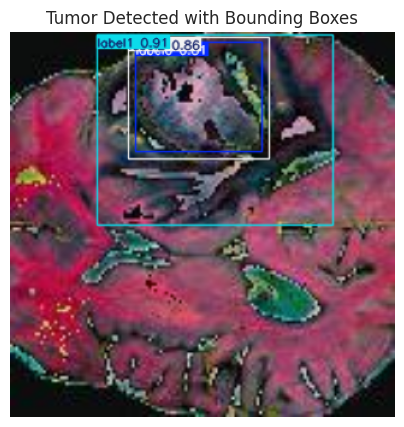

In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO  # Import the YOLO class

# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(320, 320)):
    return cv2.resize(image, size)

# Function to perform tumor detection on a single image
def detect_tumor(image_path, model):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded correctly
    if image is None:
        print(f"Failed to load image: {image_path}")
        return
    
    # Resize and normalize the image
    resized_image = resize_image(image, size=(320, 320))
    normalized_image = normalize_image(resized_image)
    
    # Convert the normalized image to uint8 data type for prediction
    normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
    
    # Predict with the model
    results = model.predict(source=normalized_image_uint8, imgsz=320, conf=0.5)
    
    # Check if any tumors are detected (check if there are any bounding boxes)
    if len(results[0].boxes) > 0:
        # Tumor detected: Show the image with bounding boxes
        print("Tumor is present.")
        annotated_image = results[0].plot(line_width=1)
        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        
        # Display the image with bounding boxes
        plt.figure(figsize=(5, 5))
        plt.imshow(annotated_image_rgb)
        plt.title("Tumor Detected with Bounding Boxes")
        plt.axis('off')
        plt.show()
    else:
        # No tumor detected: Show the original image and output a message
        print("No tumor present.")
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the original image
        plt.figure(figsize=(5, 5))
        plt.imshow(image_rgb)
        plt.title("No Tumor Present")
        plt.axis('off')
        plt.show()

# Load the trained YOLOv8 model from the saved weights (best.pt)
model = YOLO('/kaggle/input/yolomodel/pytorch/default/1/best (4).pt')  # Replace with the path to your saved model

# Path to a single test image
test_image_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/TumorDetectionYolov8/OD8/Brain Tumor Detection/test/images/volume_104_slice_74_jpg.rf.c780b429b5ee360d9352595ec769c9a8.jpg'  # Replace with your image path

# Perform tumor detection on the test image
detect_tumor(test_image_path, model)
